In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [63]:
# Read in data
df=pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [64]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [65]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [66]:
print(df.shape)

(568454, 10)


In [67]:
df=df.head(50)
print(df.shape)

(50, 10)


## EDA(Exploratory Data Analysis)

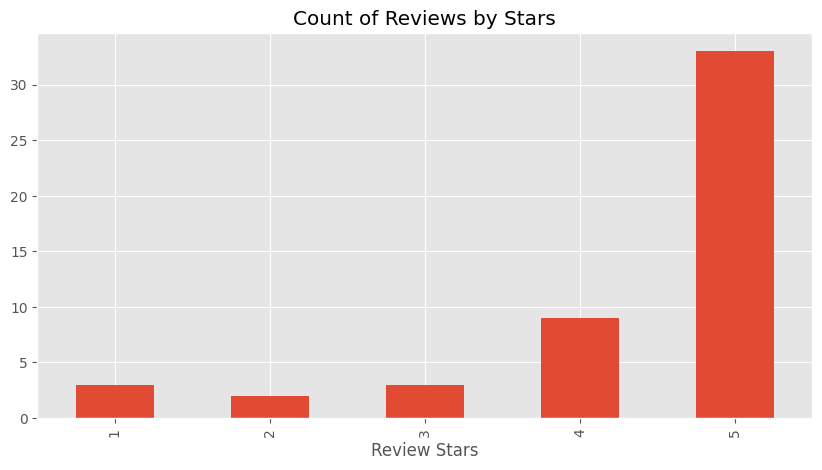

In [68]:
ax=df['Score'].value_counts().sort_index() \
.plot(kind='bar',
      title="Count of Reviews by Stars",
      figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK(Natural Language ToolKit)

In [69]:
example=df['Text'][38]
print(example)

I WAS VISITING MY FRIEND NATE THE OTHER MORNING FOR COFFEE , HE CAME OUT OF HIS STORAGE ROOM WITH ( A PACKET OF McCANNS INSTANT IRISH OATMEAL .) HE SUGGESTED THAT I TRY IT FOR MY OWN USE ,IN MY STASH . SOMETIMES NATE DOSE NOT GIVE YOU A CHANCE TO SAY NO , SO I ENDED UP TRYING THE APPLE AND CINN . FOUND IT TO BE VERY TASTEFULL WHEN MADE WITH WATER OR POWDERED MILK . IT GOES GOOD WITH O.J. AND COFFEE AND A SLICE OF TOAST AND YOUR READY TO TAKE ON THE WORLD...OR THE DAY AT LEAST..  JERRY REITH...


In [70]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'WAS',
 'VISITING',
 'MY',
 'FRIEND',
 'NATE',
 'THE',
 'OTHER',
 'MORNING',
 'FOR']

In [71]:
## Assignning each words their own parts of speech(tokens->specific parts of speech)
tagged=nltk.pos_tag(tokens) 
tagged[:10]

[('I', 'PRP'),
 ('WAS', 'VBP'),
 ('VISITING', 'VBG'),
 ('MY', 'NNP'),
 ('FRIEND', 'NNP'),
 ('NATE', 'NNP'),
 ('THE', 'NNP'),
 ('OTHER', 'NNP'),
 ('MORNING', 'NNP'),
 ('FOR', 'NNP')]

In [72]:
## Making chunks of the tokens
entities=nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  I/PRP
  WAS/VBP
  VISITING/VBG
  (ORGANIZATION MY/NNP)
  FRIEND/NNP
  NATE/NNP
  THE/NNP
  OTHER/NNP
  MORNING/NNP
  FOR/NNP
  COFFEE/NNP
  ,/,
  HE/NNP
  CAME/NNP
  OUT/NNP
  OF/IN
  (ORGANIZATION HIS/NNP)
  STORAGE/NNP
  ROOM/NNP
  WITH/NNP
  (/(
  A/NNP
  (ORGANIZATION PACKET/NNP OF/NNP)
  McCANNS/NNP
  INSTANT/NNP
  IRISH/NNP
  OATMEAL/NNP
  ./.
  )/)
  HE/PRP
  SUGGESTED/VBZ
  THAT/IN
  I/PRP
  TRY/VBP
  IT/NNP
  FOR/NNP
  MY/NNP
  OWN/NNP
  USE/NNP
  ,/,
  IN/NNP
  MY/NNP
  STASH/NNP
  ./.
  (ORGANIZATION SOMETIMES/NNP)
  (ORGANIZATION NATE/NNP)
  DOSE/NNP
  NOT/NNP
  GIVE/NNP
  YOU/VBZ
  A/DT
  (ORGANIZATION CHANCE/NN TO/NNP)
  SAY/NNP
  NO/NNP
  ,/,
  SO/NNP
  I/PRP
  ENDED/VBP
  UP/RB
  TRYING/CD
  (ORGANIZATION THE/NNP)
  (ORGANIZATION APPLE/NNP)
  AND/NNP
  CINN/NNP
  ./.
  FOUND/VBD
  IT/NNP
  TO/NNP
  BE/NNP
  VERY/NNP
  TASTEFULL/NNP
  WHEN/NNP
  MADE/NNP
  WITH/NNP
  WATER/NNP
  OR/NNP
  POWDERED/NNP
  MILK/NNP
  ./.
  IT/NNP
  GOES/NNP
  GOOD/NNP
  WITH/NNP
  O.J/N

## VADER Sentiment Scoring(Valence Aware Dictionary and sEntiment Reasoner)

Mathematically calculates the score of the sentence by assigning negative/positive/neutral scores to the text and sums up to derive the emotion of the sentence.

Does not account the relationship between sentences

This method uses "Bag Of Words" approach-
    1. Stop words are removed
    2. Each word is scored and combined to a total score

In [79]:
!pip install ipywidgets

In [85]:
!pip install twython

^C


In [86]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm ## Progress bar tracker for loops

sia = SentimentIntensityAnalyzer()

In [87]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [88]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [89]:
## Running the sia on the example
sia.polarity_scores(example)

{'neg': 0.028, 'neu': 0.842, 'pos': 0.13, 'compound': 0.891}

In [90]:
## Run the polarity on the entire dataset
res={} 
for i,row in tqdm(df.iterrows(), total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
    break

  0%|          | 0/50 [00:00<?, ?it/s]

In [91]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}}

In [92]:
# Create the DataFrame from 'res'
vaders = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'Id'})

# Ensure 'Id' is the column to merge on
vaders = vaders.merge(df, how='left', on='Id')


In [93]:
# Sentiment Score and Metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


## Plotting the VADER Results

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


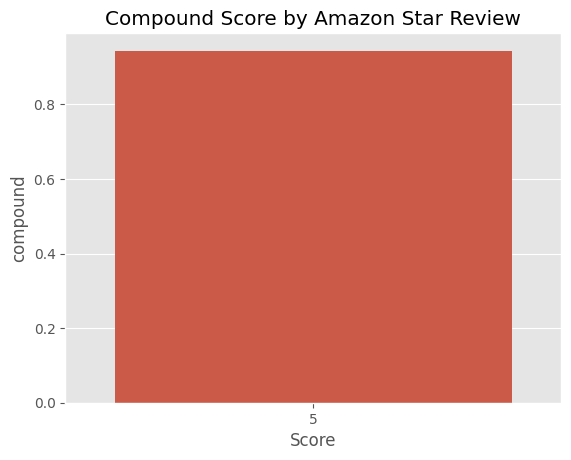

In [94]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


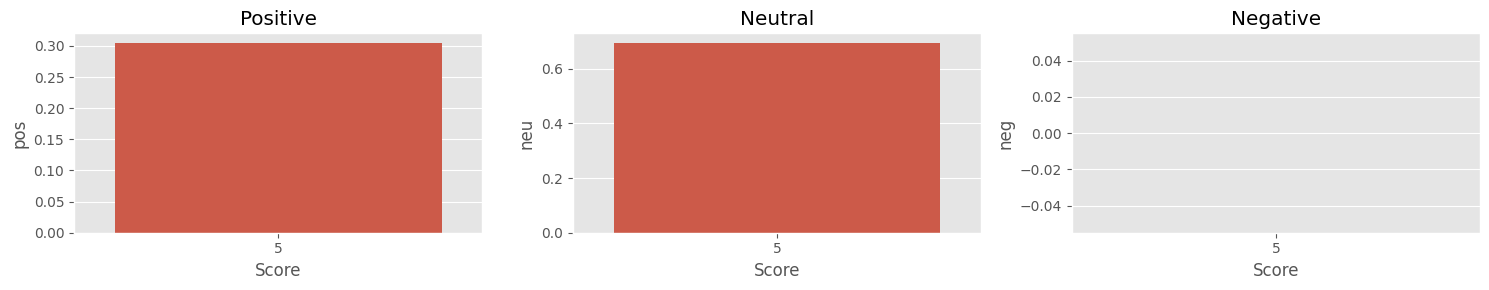

In [99]:
fig,axs=plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders, x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## RoBERTa Pretrained Model

The pretrained transformer models have better ability to pickup context related to other words

In [101]:
from  transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [107]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like cardiffnlp/twitter-roberta-base-sentiment is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [105]:
# VADER Result on example
print(example)
sia.polarity_scores(example)

I WAS VISITING MY FRIEND NATE THE OTHER MORNING FOR COFFEE , HE CAME OUT OF HIS STORAGE ROOM WITH ( A PACKET OF McCANNS INSTANT IRISH OATMEAL .) HE SUGGESTED THAT I TRY IT FOR MY OWN USE ,IN MY STASH . SOMETIMES NATE DOSE NOT GIVE YOU A CHANCE TO SAY NO , SO I ENDED UP TRYING THE APPLE AND CINN . FOUND IT TO BE VERY TASTEFULL WHEN MADE WITH WATER OR POWDERED MILK . IT GOES GOOD WITH O.J. AND COFFEE AND A SLICE OF TOAST AND YOUR READY TO TAKE ON THE WORLD...OR THE DAY AT LEAST..  JERRY REITH...


{'neg': 0.028, 'neu': 0.842, 'pos': 0.13, 'compound': 0.891}

In [108]:
# Run for Roberta Model
encoded_test=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][o].detach().numpy()
scores.softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu' :scores[1],
    'roberta_neu' :scores[2]
}
print(scores_dict)

NameError: name 'tokenizer' is not defined

In [110]:
def polarity_scores_roberta(example):
    encoded_test=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][o].detach().numpy()
    scores.softmax(scores)
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu' :scores[1],
        'roberta_neu' :scores[2]
    }
    return(scores_dict)

In [121]:
## Run the polarity on the entire dataset
res={} 
for i,row in tqdm(df.iterrows(), total=len(df)):
    try:
        text=row['Text']
        myid=row['Id']
        vader_result=sia.polarity_scores(text)
        vader_result_rename={abs}
        for key,value in vader_result.items():
            vader_result_rename[f"vadar_{key}"]=value
        roberta_result=polarity_scores_roberta(text)
        both={**roberta_result,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/50 [00:00<?, ?it/s]

TypeError: 'set' object does not support item assignment

In [125]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df,how='left')

## Compare Scores between models

In [126]:
results_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

KeyError: 'vader_neg'

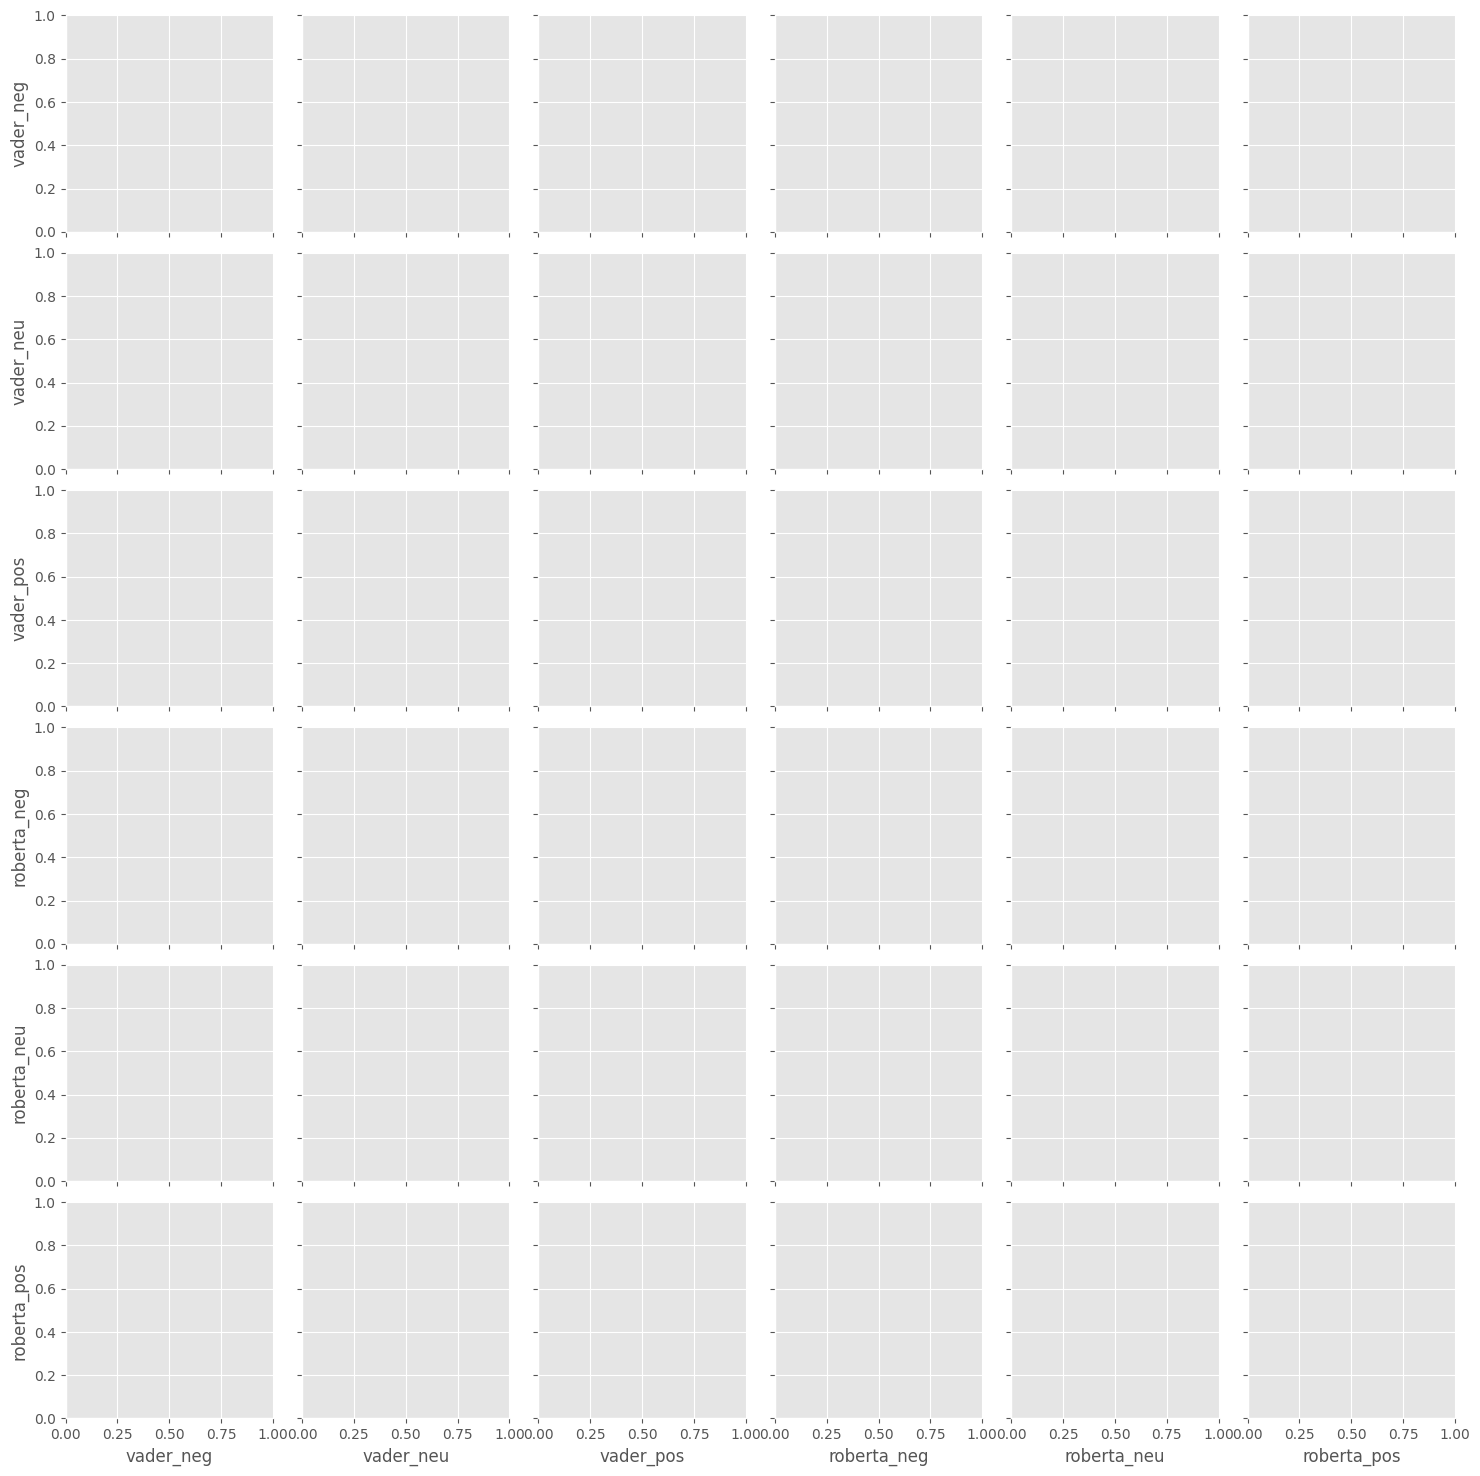

In [128]:
sns.pairplot(data=results_df,
             vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

## Review Examples

In [130]:
results_df.query('Score == 1') \
.sort_values('roberta_pos', ascending=False)['Text'].values[0]

KeyError: 'roberta_pos'

In [131]:
results_df.query('Score == 1') \
.sort_values('vader_pos', ascending=False)['Text'].values[0]

KeyError: 'vader_pos'

In [132]:
results_df.query('Score == 5') \
.sort_values('roberta_neg', ascending=False)['Text'].values[0]

KeyError: 'roberta_neg'

In [133]:
results_df.query('Score == 2') \
.sort_values('vader_neg', ascending=False)['Text'].values[0]

KeyError: 'vader_neg'

## The Transfomers PipeLine

In [134]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment_analysis")

KeyError: "Unknown task sentiment_analysis, available tasks are ['audio-classification', 'automatic-speech-recognition', 'depth-estimation', 'document-question-answering', 'feature-extraction', 'fill-mask', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-to-image', 'image-to-text', 'mask-generation', 'ner', 'object-detection', 'question-answering', 'sentiment-analysis', 'summarization', 'table-question-answering', 'text-classification', 'text-generation', 'text-to-audio', 'text-to-speech', 'text2text-generation', 'token-classification', 'translation', 'video-classification', 'visual-question-answering', 'vqa', 'zero-shot-audio-classification', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-object-detection', 'translation_XX_to_YY']"

In [135]:
sent_pipline('I love to workout and exercise')

NameError: name 'sent_pipline' is not defined